# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [338]:
# Load pickled data
import pickle

import os

dir_curr = os.getcwd()

training_file = os.path.join(dir_curr, 'data/train.p')
testing_file = os.path.join(dir_curr, 'data/test.p')


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_raw, y_train_raw = train['features'], train['labels']
X_test_raw, y_test_raw = test['features'], test['labels']

#todo: shuffle the x,y coherently

In [339]:
### To start off let's do a basic data summary.

# number of training examples
n_train = X_train_raw.shape[0]

# numb.er of testing examples
n_test = X_test_raw.shape[0]

# the shape of an image
image_shape = X_train_raw.shape[1:]

# how many classes are in the dataset
n_classes = len(set(y_train_raw))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


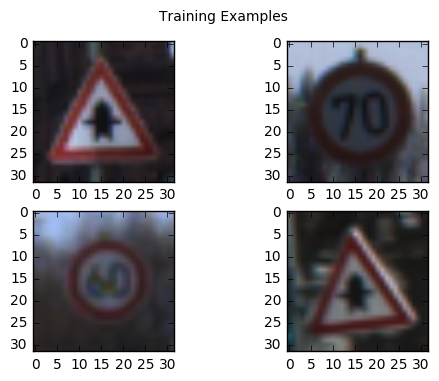

In [340]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
import numpy as np

# plot training examples

def findRandomTrainingImage():
    idx = int(n_train * np.random.random())
    image_np = np.array(X_train_raw[idx])
    return image_np
    


plt.figure(1)
plt.suptitle('Training Examples')

plt.subplot(221)
img = findRandomTrainingImage()
plt.imshow(img)

plt.subplot(222)
img = findRandomTrainingImage()
plt.imshow(img)

plt.subplot(223)
img = findRandomTrainingImage()
plt.imshow(img)

plt.subplot(224)
img = findRandomTrainingImage()
plt.imshow(img)

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [341]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Normalize Image data for Zero Mean and Equal Variance
X_train_norm = (X_train_raw - 128.0)/128.0
X_test_norm = (X_test_raw - 128.0)/128.0


    

y_train_one_hot = np.eye(n_classes)[y_train_raw]
y_test_one_hot = np.eye(n_classes)[y_test_raw]





### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

In [342]:
### todo: Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.



#todo: image transformation, e.g. rotation, illumination
from scipy import ndimage 


def TrafSign_DataAugmentation_Rotation(existing_data, num_of_new): 

    # X_train_rot = np.array([], dtype=np.int).reshape((0,)+X_train_raw[0].shape) 
    degree =  (360/(num_of_new+1))  # increment by (360/rotation_image_num)
    
    data_rot = ndimage.rotate(existing_data,degree,(2,1),reshape=False)

    for i in range(num_of_new-1):
        data_rot_tmp = ndimage.rotate(existing_data,degree*(i+2),(2,1),reshape=False) # i+2 is for the 2nd new image array
        data_rot = np.vstack((data_rot,data_rot_tmp))
    return data_rot


Rotation_NumOfNewImage = 2
X_train_rot = TrafSign_DataAugmentation_Rotation(X_train_raw, Rotation_NumOfNewImage)
y_train_rot_one_hot = np.tile(y_train_one_hot, (Rotation_NumOfNewImage, 1))


8594


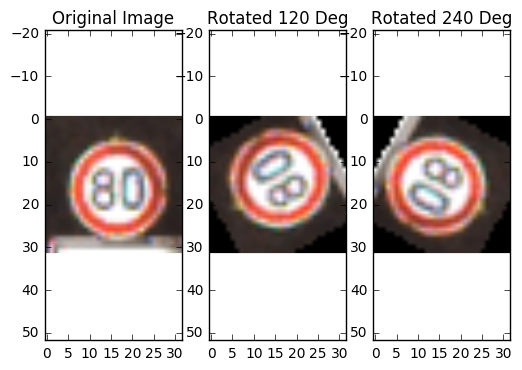

In [343]:
# plot augmented examples

idx = int(n_train * np.random.random())

print(idx)
fig, axes = plt.subplots(nrows=1, ncols=Rotation_NumOfNewImage+1, sharex=True)

img = X_train_raw[idx]
axes[0].set_title('Original Image')
axes[0].imshow(img)

for i in range(Rotation_NumOfNewImage):
    img = X_train_rot[idx + i*n_train]
    axes[i+1].set_title('Rotated {} Deg'.format((i+1)*(360//(Rotation_NumOfNewImage+1))))
    axes[i+1].imshow(img)

plt.show()

In [344]:
X_train = np.vstack((X_train_norm, X_train_rot))
y_train = np.vstack((y_train_one_hot,y_train_rot_one_hot))

X_test = X_test_norm
y_test = y_test_one_hot

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [346]:
# cross validation

from sklearn.model_selection import train_test_split


#shuffle the example set, so the gradients do not get tuned into the patterns in the dataset. 
InputSet_Train, InputSet_Validation, OutputLabel_Train, OutputLabel_Validation = \
     train_test_split(X_train, y_train, test_size=0.2, random_state=10, stratify=y_train)



InputSet_Test = X_test
OutputLabel_Test = y_test_one_hot




size_train = InputSet_Train.shape[0]
size_validation = OutputLabel_Validation.shape[0]
size_test = OutputLabel_Test.shape[0]


print('Input Set Size: \n Training = ', InputSet_Train.shape, 
      '\n Validation = ', InputSet_Validation.shape, 
      '\n Test = ', InputSet_Test.shape
     )

print('Output Set Size: \n Training = ', OutputLabel_Train.shape, 
      '\n Validation = ', OutputLabel_Validation.shape, 
      '\n Test = ', OutputLabel_Test.shape
     )


Input Set Size: 
 Training =  (94101, 32, 32, 3) 
 Validation =  (23526, 32, 32, 3) 
 Test =  (12630, 32, 32, 3)
Output Set Size: 
 Training =  (94101, 43) 
 Validation =  (23526, 43) 
 Test =  (12630, 43)


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The architecture consists of two layers of convolutional neural network

In [383]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

#Hyper-parameters
learning_rate = 0.001
epochs = 20
batch_size = 64
display_step  = 1  
Dropout_KeepProb = 0.8

# Output depth
ConvNet_1_OutputDepth = 16
ConvNet_2_OutputDepth = 32

# Image Properties
image_width = image_shape[0]
image_height = image_shape[1]
color_channels = image_shape[2]


# Convolution filter - the image size of 32x32 is small 
filter_size_width = 5
filter_size_height = 5
filter_stride = [1, 2, 2, 1] 

  

#hidden layer
n_hidden_layer = 128 # layer number of features


In [371]:
def TF_createWeight(shape):
    return tf.Variable(tf.truncated_normal(shape,stddev=0.001))

def TF_createBias(output_size):
    return tf.Variable(tf.constant(0.001,shape=[output_size]))


def TF_getFeatureNum(input_tensor):
    
    t_shape = input_tensor.get_shape()    
    if(t_shape.ndims>1):
        feature_num = t_shape[1:].num_elements()
    elif (t_shape.ndims == 0):
        raise Exception('0-D tensor is not useful to train model!') 
    
    return feature_num
        
        
def TF_flattenTensor(input_tensor):
    
    feature_num = TF_getFeatureNum(input_tensor)
    
    if(feature_num>1):
        input_tensor = tf.reshape(input_tensor,[-1,feature_num])
    elif (t_shape.ndims == 0):
        raise Exception('0-D tensor is not useful to train model!') 
        
    return input_tensor

In [372]:
def TF_createConvNetLayer(
                            input_x,
                            filter_shape, 
                            stride, 
                            padding, 
                            relu_enabled = False, 
                            maxpool_enable = False,
    ):
    
    weight = TF_createWeight(filter_shape)
    bias = TF_createBias(filter_shape[3])

    
    
    # Apply Convolution 
    conv_layer_weight = tf.nn.conv2d(input_x, weight, stride, padding) 
    # the input tensor has 4 dimensions: [batch, height, width, channels] 

    # Add bias 
    conv_layer = tf.add(conv_layer_weight, bias) 
    
    if maxpool_enable == True:
        conv_layer = tf.nn.max_pool(    value=conv_layer,
                                   ksize=[1, 2, 2, 1],
                                   strides=[1, 1, 1, 1],
                                   padding='SAME'
                              )
            
    if (relu_enabled == True):
        # Apply activation function 
        conv_layer = tf.nn.relu(conv_layer)
        
    return conv_layer


def TF_creatFulConLayer2D(input_x, output_size, relu_enable = False):
    
    input_x = TF_flattenTensor(input_x)
    
    feature_num = TF_getFeatureNum(input_x)
    
    
    weight = TF_createWeight([feature_num, output_size ])
    bias = TF_createBias(output_size)


    fc_layer = tf.add(tf.matmul(input_x, weight), bias)

    if(relu_enable == True):       
        fc_layer = tf.nn.relu(fc_layer)    

    return fc_layer

In [373]:
# Input/Image - [batch_size, height, width, channels] 

nn_input = tf.placeholder( 
                    tf.float32, 
                    shape=[None, image_width, image_height, color_channels]
                   )


nn_output = tf.placeholder(tf.float32, [None, n_classes]) 
#nn_output = tf.placeholder(tf.int64, [ None]) 
# one_hot() takes first parameter as indeces, which has value begin from 0. However, the class value can be any number, real or nutural number.
# n_output_one_hot = tf.one_hot(nn_output, n_classes)

In [374]:
#Model Architecture:

layer_convn1 = TF_createConvNetLayer(
                                nn_input,
                                filter_shape = [filter_size_width, filter_size_height, color_channels, ConvNet_1_OutputDepth],
                                stride = filter_stride,
                                padding = 'SAME',
                                relu_enabled = True,
                                maxpool_enable = False,
                              )
layer_convn2 = TF_createConvNetLayer(
                                layer_convn1,
                                filter_shape = [filter_size_width, filter_size_height, ConvNet_1_OutputDepth, ConvNet_2_OutputDepth],
                                stride = filter_stride,
                                padding = 'SAME',
                                relu_enabled = True,
                                maxpool_enable = True,
                              )

layer_fc1 = TF_creatFulConLayer2D(layer_convn2, output_size = n_hidden_layer, relu_enable = True)

layer_fc1 = tf.nn.dropout(layer_fc1, Dropout_KeepProb)

logits = TF_creatFulConLayer2D(layer_fc1, output_size = n_classes, relu_enable = False)


In [375]:

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, nn_output))

# cost = tf.reduce_mean(-tf.reduce_sum(nn_output * tf.log(tf.clip_by_value(tf.nn.softmax(logits),1e-10,1.0)), reduction_indices=[1]))
# GradientDescentOptimizer() is slower in driving down lost. Based on my test of 20 epochs, Adam acheives >90% after 10 epochs, while regular gradient descent optimizer attains only 6% accuracy.  
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(nn_output, 1))
# Calculate validation accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [384]:
import logging
logging.basicConfig(filename='log_test_result.txt', level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')
logging.info('========================================\n                                     Training Begins - AdamOptimizer  \n=========================================================================')
logging.info('Learning Rate: {}'.format(learning_rate))
logging.info('Batch Size: {}'.format(batch_size))
logging.info('Kernal Size: {} x {}'.format(filter_size_width, filter_size_height))
logging.info('Stride Parameters Size: {}'.format(filter_stride))
logging.info('Dropout keep_prob: {}'.format(Dropout_KeepProb))


logging.info('layer_convn1: {}'.format(layer_convn1))
logging.info('layer_convn2: {}'.format(layer_convn2))
logging.info('layer_fc1: {}'.format(layer_fc1))
logging.info('logits: {}'.format(logits))

In [377]:
import time
from datetime import timedelta

time_start = time.time()


    
def findNextDatasetBatch(batch_idx, batch_total, batch_length, ls_input_matrix, ls_output_matrix):
    
    if (batch_idx == (batch_total-1)):
        #last batch does not necessarily have enough examples
        return ls_input_matrix[batch_idx*batch_length:], ls_output_matrix[batch_idx*batch_length:]
    else:
        return ls_input_matrix[batch_idx*batch_length:(batch_idx+1)*batch_size], ls_output_matrix[batch_idx*batch_length:(batch_idx+1)*batch_length]
    
    

def calcDatasetAccuracy(session, ls_input_matrix, ls_output_matrix):

    length = batch_size #use global batch size
    total_num = int(np.ceil(ls_input_matrix.shape[0]/batch_size))
    
    accu_sum_batch = 0
    
    # Loop over all batches
    for i in range(total_num):
        batch_x, batch_y = findNextDatasetBatch(i, total_num, length, ls_input_matrix,  ls_output_matrix)
        
        accu_sum_batch += session.run(accuracy, feed_dict={nn_input: batch_x, nn_output: batch_y})
        
    accu_full = accu_sum_batch/total_num
    
    return accu_full
    
 
def calcFinalAccuracy(session):
    
    
    accu_full_train = calcDatasetAccuracy(session, InputSet_Train, OutputLabel_Train )

    print("Accuracy - Full Training:", accu_full_train)
    logging.info("***Accuracy - Full Training:         {:.2f}%".format( accu_full_train*100) )

    
    
    accu_full_validation = calcDatasetAccuracy(session, InputSet_Validation, OutputLabel_Validation )
    
    print("Accuracy - Full Validation:", accu_full_validation)    
    logging.info("***Accuracy - Full Validation:       {:.2f}%".format( accu_full_validation*100) )
    
    
    
    accu_full_test = calcDatasetAccuracy(session, InputSet_Test, OutputLabel_Test )
    
    print("Accuracy - Full Test:", accu_full_test)    
    logging.info("***Accuracy - Full Test:             {:.2f}%".format( accu_full_test*100) )
    


In [378]:
### Train your model here.
### Feel free to use as many code cells as needed.

# Launch the graph"
with tf.Session() as sess:
    
    sess.run(init)

    # Training cycle
    for epoch in range(epochs):
        total_batch = int(size_train/batch_size) 
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = findNextDatasetBatch(i, total_batch, batch_size, InputSet_Train, OutputLabel_Train )

            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={nn_input: batch_x, nn_output: batch_y})
            
            #Debug_PrintSession()

        # Display logs per epoch step
        if epoch % display_step == 0:
            
            batch_x, batch_y = findNextDatasetBatch(0, total_batch, batch_size, InputSet_Train, OutputLabel_Train ) # use first batch to test
            
            c = sess.run(cost, feed_dict={nn_input: batch_x, nn_output: batch_y})

            logging.debug("Epoch: {:5d};  cost={:.9f}".format((epoch+1), c))
 
            accu_vali = accuracy.eval({nn_input: batch_x, nn_output: batch_y})
    
            logging.debug("Accuracy(training batch): {:.2f}%".format(accu_vali*100)) 
      
    
    print("Optimization Finished!")
    logging.info("Optimization Finished!")
    # Test model
    
    calcFinalAccuracy(sess)

    
time_end = time.time()
print("Time usage: " + str(timedelta(seconds=int( time_end - time_start))))
logging.info("Time usage: {}".format(timedelta(seconds=int( time_end - time_start))) )

Optimization Finished!
Accuracy - Full Training: 0.934811615847
Accuracy - Full Validation: 0.914256918689
Accuracy - Full Test: 0.758824035676
Time usage: 0:19:50


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [379]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [380]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [381]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.